### Waves 4,5,6

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/work_quality_indexes.csv"
)

In [43]:
df = df.merge(indexes, on=["country", "year", "isco"], how="inner")

In [44]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_intensity,jqi_prospects,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted
0,AT-011070-01,4,2011,59.0,2.0,1,Civil servant,2.0,0,Austria,...,54.069767,31.155303,85.271991,1943.392006,81.715087,81.799510,97.635841,56.602230,32.709902,92.131193
1,AT-326780-02,4,2011,57.0,2.0,1,Civil servant,5.0,1,Austria,...,54.069767,31.155303,85.271991,1943.392006,81.715087,81.799510,97.635841,56.602230,32.709902,92.131193
2,AT-413796-01,4,2011,55.0,1.0,1,Civil servant,2.0,0,Austria,...,54.069767,31.155303,85.271991,1943.392006,81.715087,81.799510,97.635841,56.602230,32.709902,92.131193
3,AT-433002-01,4,2011,55.0,1.0,0,Civil servant,6.0,1,Austria,...,54.069767,31.155303,85.271991,1943.392006,81.715087,81.799510,97.635841,56.602230,32.709902,92.131193
4,AT-594803-02,4,2011,57.0,1.0,1,Civil servant,4.0,1,Austria,...,54.069767,31.155303,85.271991,1943.392006,81.715087,81.799510,97.635841,56.602230,32.709902,92.131193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,SI-951611-02,6,2015,54.0,2.0,1,Public sector employee,3.0,0,Slovenia,...,58.139535,31.250000,96.875000,554.748656,29.678305,24.060877,40.734421,26.460570,17.093089,49.651581
7268,SI-966058-01,6,2015,57.0,2.0,0,Public sector employee,4.0,1,Slovenia,...,63.565891,42.857143,89.389706,659.185057,43.628426,68.433711,61.778573,39.993333,35.662705,63.517250
7269,SI-974683-01,6,2015,57.0,2.0,1,Public sector employee,1.0,0,Slovenia,...,41.860465,58.653846,91.523438,383.575878,18.783260,35.997276,36.763208,25.365239,29.883727,42.851541
7270,SI-988814-02,6,2015,59.0,3.0,1,Private sector employee,0.0,0,Slovenia,...,37.790698,75.000000,94.000000,2026.117064,118.743503,142.708718,138.440094,63.146188,120.958226,149.977384


In [45]:
df.mergeid.nunique()

4247

In [46]:
df.groupby("country").mergeid.nunique()

country
Austria           211
Belgium           673
Czech Republic    261
Denmark           337
Estonia           425
France            285
Germany           575
Italy             396
Slovenia          259
Spain             570
Switzerland       255
Name: mergeid, dtype: int64

In [47]:
df.groupby("year").mergeid.nunique()

year
2011    1712
2013    2464
2015    3096
Name: mergeid, dtype: int64

In [48]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/final_w456.csv",
    index=False,
)

### Some descriptive stats

In [49]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,7272.00,7272.00,7272.00,7272.00
mean,56.51,0.57,1.77,12.99
std,3.12,0.50,1.26,4.31
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,11.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,10.00,39.00


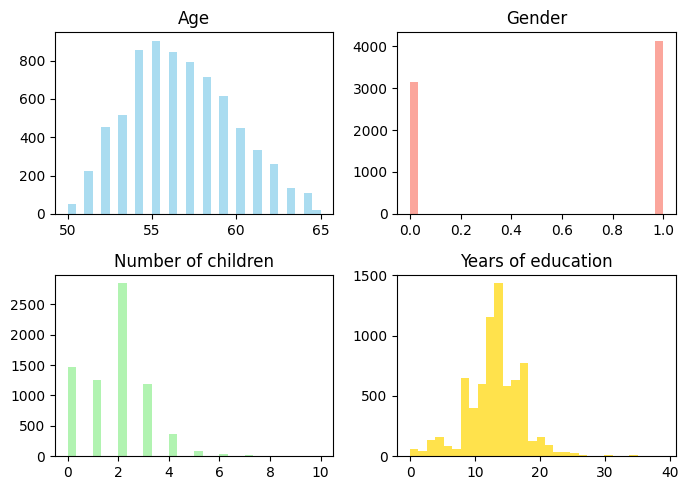

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [51]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.42
Public sector employee     0.26
Employee                   0.17
Self-employed              0.12
Civil servant              0.05
Name: proportion, dtype: float64

In [52]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,7272.00,7272.00,7272.00,7272.00
mean,35.94,63.40,6.89,0.36
std,6.12,2.11,3.39,0.65
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.00,0.00
50%,37.00,65.00,7.00,0.00
75%,40.00,65.00,9.17,0.50
max,55.00,68.00,17.00,4.00


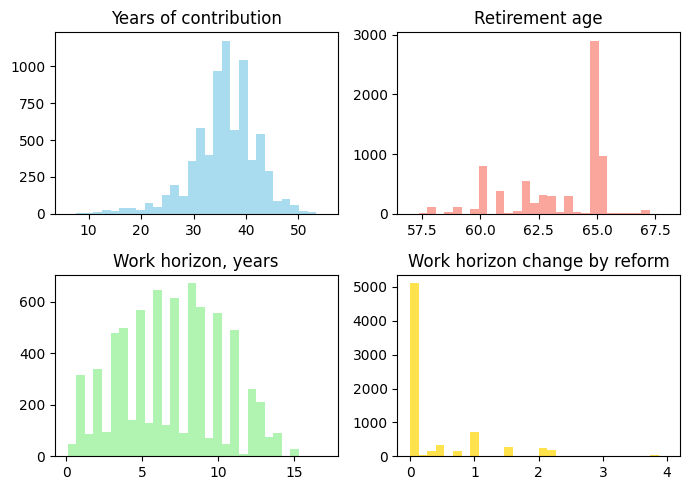

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [54]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64

In [55]:
df["eurod"].value_counts()

eurod
0.0     1882
1.0     1771
2.0     1296
3.0      914
4.0      638
5.0      376
6.0      200
7.0      107
8.0       44
9.0       32
10.0       8
11.0       4
Name: count, dtype: int64

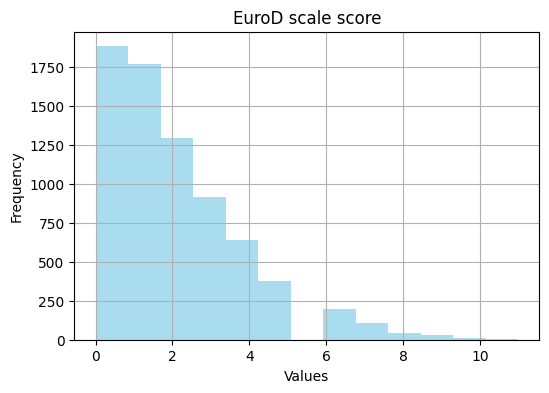

In [56]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [57]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,7272.00,7272.00,7272.00,7272.00,7272.00,7272.00,7272.00
mean,1526.05,58.76,79.71,85.37,49.00,40.58,87.21
std,674.22,14.05,7.07,8.94,7.49,12.27,10.84
min,124.83,14.97,40.91,39.74,11.63,0.00,15.62
25%,1084.90,48.02,75.32,80.17,44.60,33.33,81.62
50%,1434.23,57.72,80.11,88.33,49.57,40.00,89.74
75%,1815.60,70.97,84.38,92.04,53.69,48.96,95.66
max,12267.43,93.62,100.00,100.00,81.40,100.00,100.00


### Waves 4,5,6 common individuals

In [58]:
df.mergeid.nunique()

4247

In [59]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

815

In [60]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [61]:
w456_common.mergeid.nunique()

815

In [62]:
w456_common.groupby("country").mergeid.nunique()

country
Austria            64
Belgium           195
Czech Republic     56
Denmark            89
Estonia           124
France            105
Germany            12
Italy              64
Slovenia           45
Spain              61
Name: mergeid, dtype: int64

In [63]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [64]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/data_clean_w456_common.csv",
    index=False,
)

### Waves 4 and 6

In [65]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [66]:
w46.mergeid.nunique()

3846

In [67]:
w46.groupby("country").mergeid.nunique()

country
Austria           207
Belgium           606
Czech Republic    234
Denmark           311
Estonia           406
France            274
Germany           471
Italy             356
Slovenia          240
Spain             486
Switzerland       255
Name: mergeid, dtype: int64

In [68]:
w46.groupby("wave").mergeid.nunique()

wave
4    1712
6    3096
Name: mergeid, dtype: int64

In [69]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/data_clean_w46.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [70]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

962

In [71]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [72]:
w46_common.groupby("country").mergeid.nunique()

country
Austria            74
Belgium           234
Czech Republic     69
Denmark            96
Estonia           141
France            119
Germany            15
Italy              83
Slovenia           57
Spain              74
Name: mergeid, dtype: int64

In [73]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [74]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/data_clean_w46_common.csv",
    index=False,
)